In [133]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from scipy import stats
import os

# Shutil is a recursive tool to delete file paths
# Note: Only needed if you plan to overwrite existing filepaths
import shutil

In [211]:
os.getcwd()

'C:\\Users\\admin\\Documents\\__SU22\\DOETrucksMeeting\\Chris\\fit_para'

# Preprocessing Edge Labels

In [45]:
# nodeOrders = pd.read_excel('0623_hetero\\Batch_Div27_2021_03_months_Conv_BE_RH_Base_Edges_Crr_Std_Results_metrics (1).xlsx', sheet_name = "RouteMatching", index_col=None, usecols=['Name3', 'Name2'])
# # nodeOrders['Index'] = range(1, len(nodeOrders) + 1)
# # nodeOrders = nodeOrders.set_index('Name')
# # nodeOrders = nodeOrders.to_dict('index')
# # dictionary = {}
# # for k, v in nodeOrders.items():
# #     k1 = k[1:-1]
# #     dictionary[k1] = 
# display(nodeOrders)

In [33]:
a = 'Edge_40p404_-86p853_41p687_-86p149_Raw_Class_8'
a_n = 'Edge_40p404_-86p853_41p684_-86p147'

a = a.split('_')[1:5]
a_n = a_n.split('_')[1:5]

a = [[int(j) for j in i.split('p')] for i in a]
a_n = [[int(j) for j in i.split('p')] for i in a_n]
a, a_n

np.size(a, 0)

def checking(x, y):
    a_ = np.asarray(x)
    b_ = np.asarray(y)
    
    c = [((a_[i][0] == b_[i][0]) and (a_[i][1] >= (b_[i][1]-2)) and (a_[i][1] <= (b_[i][1]+2))) for i in range(np.size(a_, 0))]
    
    return c

checking(a, a_n)


[True, True, False, True]

In [27]:
a_n

[[40, 404], [-86, 853], [41, 686], [-86, 147]]

In [ ]:
# a_n = 'Edge_40p404_-86p853_41p686_-86p150'
# b = a.split('_')[1:5]

In [213]:
# nodes = pd.read_excel('Routes.xlsx', index_col=None, usecols=['Route_Name', 'StartNode', 'EndNode'])
# newFrame = nodes['Route_Name'].to_frame()
# newFrame['StartNode'] = np.vectorize(dictionary.get)(nodes['StartNode'])
# newFrame['EndNode'] = np.vectorize(dictionary.get)(nodes['EndNode'])
# display(nodes)
# newFrame

In [37]:
# nodeOrders = pd.read_excel('Batch_Div27_2021_03_months_Conv_BE_RH_Base_Edges_Crr_Std_Results_metrics.xlsx', sheet_name = "RouteMatching", index_col=None, usecols=['Name2', 'Name3'])
# nodeOrders
# nodeOrders = nodeOrders.set_index('Name3')
# nodeOrders = nodeOrders.to_dict('index')
# dictionary = {}
# for k, v in nodeOrders.items():
#     k1 = k[1:-1]
#     # N1 corrections
#     k1 = k1.replace('150', '149')
#     k1 = k1.replace('686', '687')
#     # N3 corrections
#     k1 = k1.replace('41p432', '41p433')
#     k1 = k1.replace('85p268', '85p266')
#     # N11 corrections
#     k1 = k1.replace('41p502', '41p505')
#     k1 = k1.replace('88p132', '88p130')
    
    
#     dictionary[k1] = list(v.values())[0][1:-1]
# dictionary

# # Change 150 to 149

In [215]:
# nodes = pd.read_excel('Routes.xlsx', index_col=None, usecols=['Route_Name', 'StartNode', 'EndNode'])
# a = pd.Series(nodes['StartNode'].values).unique()
# b = pd.Series(nodes['EndNode'].values).unique()
# c = np.union1d(a, b)

# dictionary = {b: a for a, b in enumerate(set(c), 1)}
# np.vectorize(dictionary.get)(nodes['StartNode'])
# newFrame = nodes['Route_Name'].to_frame()
# newFrame['StartNode'] = np.vectorize(dictionary.get)(nodes['StartNode'])
# newFrame['EndNode'] = np.vectorize(dictionary.get)(nodes['EndNode'])
# newFrame = newFrame.set_index('Route_Name')
# display(newFrame)

# dic1 = newFrame.to_dict('index')
# dic2 = {}
# display(dic1)

# for k, v in dic1.items():
#     k1 = k[1:-1]
#     dic2[k1] = list(v.values())
# display(dic2)

In [123]:
dataSourcePath = '0623_hetero\\Batch_Div27_Rep_Day_Class_8_Compiled_Results_metrics.xlsx'
df1 = pd.read_excel(dataSourcePath, index_col=None, usecols=['Vehicle Model-none',\
                      'Battery Energy Consumption per Mile-kWh/mi',\
                      'Fuel Consumption per 100 miles-Diesel Equiv. gal/100mi',\
                      'Vehicle Static Mass-lbm',\
                      'Cycle Name-none',\
                      'Cargo Mass-lbm'])
# df2['Cycle Name-none'] = df1['Cycle Name-none'].map(dictionary)

# df2[['i', 'j']] = pd.DataFrame(df2['Cycle Name-none'].tolist(), index=df2.index)
# df2.drop('Cycle Name-none', inplace=True, axis=1)

# df.rename(columns = {'Cycle Name-none':'new_col1'}, inplace = True)

In [110]:
nodeOrder = pd.read_excel('0623_hetero\\Batch_Div27_2021_03_months_Conv_BE_RH_Base_Edges_Crr_Std_Results_metrics (1).xlsx', \
                          sheet_name = "RouteMatching", \
                          index_col=None, usecols= ['Name3', 'Start Node Name', 'End Node Name', 'Start Node', 'End Node'])
# nodeOrders['Index'] = range(1, len(nodeOrders) + 1)
# nodeOrders = nodeOrders.set_index('Name')
# nodeOrders = nodeOrders.to_dict('index')
# dictionary = {}
# for k, v in nodeOrders.items():
#     k1 = k[1:-1]
#     dictionary[k1] = 
display(nodeOrder)

,Start Node,End Node,Name3,Start Node Name,End Node Name
0,1,2,'Edge_41p686_-86p150_41p666_-85p992','41p686_-86p150','41p666_-85p992'
1,2,1,'Edge_41p666_-85p992_41p686_-86p150','41p666_-85p992','41p686_-86p150'
2,1,3,'Edge_41p686_-86p150_41p432_-85p268','41p686_-86p150','41p432_-85p268'
3,3,1,'Edge_41p432_-85p268_41p686_-86p150','41p432_-85p268','41p686_-86p150'
4,1,4,'Edge_41p686_-86p150_40p404_-86p853','41p686_-86p150','40p404_-86p853'
5,4,1,'Edge_40p404_-86p853_41p686_-86p150','40p404_-86p853','41p686_-86p150'
6,1,5,'Edge_41p686_-86p150_40p719_-86p026','41p686_-86p150','40p719_-86p026'
7,5,1,'Edge_40p719_-86p026_41p686_-86p150','40p719_-86p026','41p686_-86p150'
8,1,7,'Edge_41p686_-86p150_40p765_-87p111','41p686_-86p150','40p765_-87p111'
9,7,1,'Edge_40p765_-87p111_41p686_-86p150','40p765_-87p111','41p686_-86p150'


In [107]:
# a = 'Edge_40p404_-86p853_41p687_-86p149_Raw_Class_8'
# a_n = 'Edge_40p404_-86p853_41p684_-86p147'

# a = a.split('_')[1:5]
# a_n = a_n.split('_')[1:5]

# a = [[int(j) for j in i.split('p')] for i in a]
# a_n = [[int(j) for j in i.split('p')] for i in a_n]
# a, a_n

def checking(x):
    for idx, y in enumerate(nodeOrder['Name3'].values):
        thres = 5
        y = y.replace('\'', '')
        a = x.split('_')[1:5]
        b = y.split('_')[1:5]

        a = [[int(j) for j in i.split('p')] for i in a]
        b = [[int(j) for j in i.split('p')] for i in b]
        
#         print(idx)
#         print(a)
#         print(b)

        # Check if the minutes are within +- 2 
        c = [((a[i][0] == b[i][0]) and (a[i][1] >= (b[i][1]-thres)) and (a[i][1] <= (b[i][1]+thres))) for i in range(np.size(a, 0))]
        
#         print(c)
        
        # If all matches
        if (all(c)):
            # get the start, and end node
            i = nodeOrder['Start Node'].iloc[[idx]].values[0]
            j = nodeOrder['End Node'].iloc[[idx]].values[0]
            return (i, j)
    return np.nan
#             print(i, j)


In [124]:
pd.options.display.max_rows
pd.set_option('display.max_rows', None)

df1['Cycle Name-none'] = df1['Cycle Name-none'].apply(checking)
df1[['i', 'j']] = pd.DataFrame(df1['Cycle Name-none'].tolist(), index=df2.index)
df1.drop('Cycle Name-none', inplace=True, axis=1)

In [129]:
df1['i'].unique().max()
# df2.drop('Cycle Name-none', inplace=True, axis=1)

# df.rename(columns = {'Cycle Name-none':'new_col1'}, inplace = True)

18

In [230]:
df2.dropna().reset_index(drop=True)['Cycle Name-none'].unique()

array(['Div27_N4_N1', 'Div27_N8_N1', 'Div27_N2_N1', 'Div27_N1_N4',
       'Div27_N1_N8', 'Div27_N1_N2', 'Div27_N1_N10', 'Div27_N1_N14',
       'Div27_N1_N13', 'Div27_N1_N16', 'Div27_N10_N1', 'Div27_N14_N1',
       'Div27_N13_N1', 'Div27_N16_N1'], dtype=object)

# Performing OLS (with Edge Preprocessing)
### Specialized for vehiecle - class8_conv_2021_daycab_regionalhaul_FU19

Note:  -1 is a dummy value (for self-loops and array padding)

In [88]:
# Setup for csv files index and column labels
df = df2
saveFolderName = "OLS_Data"
parent_dir = os.getcwd()
savePath = os.path.join(parent_dir, saveFolderName)

# If the folder already exists, remove the folder
if os.path.exists(savePath):
    shutil.rmtree(savePath)
os.makedirs(savePath)
    

vehicleTypes = pd.Series(df['Vehicle Model-none'].values).unique()

numNodes = 88
cols = ["i_" + str(i) for i in range(1, numNodes+1)]
rows = ["j_" + str(i) for i in range(1, numNodes+1)]

# Loop for Vehicle Types (k)
for v in vehicleTypes:
    workFrame = df[df["Vehicle Model-none"] == v]
    newFrame = pd.DataFrame(columns = cols, index = rows)

    # Iterate over node values i, j, and assign constants a, b, into "newFrame"
    for i in range(1, numNodes + 1):
        for j in range(1, numNodes + 1):

            data = workFrame.loc[((workFrame['i'] == i) & (workFrame['j'] == j))]

            # edge case if i = j or data Doesn't exist
            if i == j :
                newFrame.iat[i-1, j-1] = -1
                continue
            if data.size == 0:
                newFrame.iat[i-1, j-1] = 0
                continue

            # Doing linear regression here
            if v == 'class8_conv_2021_daycab_regionalhaul_FU19':
                Y = (data.loc[:, ['Fuel Consumption per 100 miles-Diesel Equiv. gal/100mi']]/1.60934 / 100).values.reshape(-1, 1)
            else:
                Y = (data.loc[:, ['Battery Energy Consumption per Mile-kWh/mi']]/1.60934).values.reshape(-1, 1)
            
            X = (data.loc[:, ['Vehicle Static Mass-lbm']]*0.453592).values.reshape(-1, 1)
            LR = LinearRegression()  # create object for the class
            LR.fit(X, Y)  # perform linear regression

            # Assigning the calculated a, b params
            newFrame.iat[j - 1, i - 1] = (LR.coef_.item(0), LR.intercept_.item(0))

    # Create the filePath
    tempPath2 = os.path.join(savePath, v + ".csv")
    tempPath3 = os.path.join(savePath, v + ".pkl")
    newFrame.to_csv(tempPath2)
    newFrame.to_pickle(tempPath3)

# Function: generateData
### Performs OLS on every edge and saves a, b into csv and pickle files 

> (bool) freight : Freight mode calculation on or off  
(str) dataSourcePath : Source data file path (.xlsx)  
(str) saveFolderName : Name of the folder to save the data (non-existing)

## Note:  -1 is a dummy value (for self-loops and array padding)

In [136]:
def generateData (dataSourcePath = 'Batch_Div27_2021_03_months_Conv_BE_RH_Base_Edges_Crr_Std_Results_metrics.xlsx', \
                  saveFolderName = "OLS_Data",\
                  freight = False,\
                  preprocessing = True,\
                 ):
    parent_dir = os.getcwd()
    savePath = os.path.join(parent_dir, saveFolderName)
    
    # If the folder already exists, remove the folder
    print('Checking for prexisting data')
    if os.path.exists(savePath):
        print('Removing prexisting Data')
        shutil.rmtree(savePath)
    os.makedirs(savePath)
    print('Removed previous Data!\n')
    
    # Load and trim Data
    print('Loading Data...')
    df = pd.read_excel(dataSourcePath, index_col=None, usecols=['Vehicle Model-none',\
                          'Battery Energy Consumption per Mile-kWh/mi',\
                          'Vehicle Static Mass-lbm',\
#                           'Cycle Source-none',\
                          'Cycle Name-none',\
                          'Cargo Mass-lbm'])
    print('Done Loading Data!\n')
    
    if preprocessing == True:
        print('Preprocessing Data...')
        nodeOrder = pd.read_excel('0623_hetero\\Batch_Div27_2021_03_months_Conv_BE_RH_Base_Edges_Crr_Std_Results_metrics (1).xlsx', \
                          sheet_name = "RouteMatching", \
                          index_col=None, usecols= ['Name3', 'Start Node Name', 'End Node Name', 'Start Node', 'End Node'])

        def checking(x):
            for idx, y in enumerate(nodeOrder['Name3'].values):
                thres = 5
                y = y.replace('\'', '')
                a = x.split('_')[1:5]
                b = y.split('_')[1:5]

                a = [[int(j) for j in i.split('p')] for i in a]
                b = [[int(j) for j in i.split('p')] for i in b]

                # Check if the minutes are within +- 2 
                c = [((a[i][0] == b[i][0]) and (a[i][1] >= (b[i][1]-thres)) and (a[i][1] <= (b[i][1]+thres))) for i in range(np.size(a, 0))]

                # If all matches
                if (all(c)):
                    # get the start, and end node
                    i = nodeOrder['Start Node'].iloc[[idx]].values[0]
                    j = nodeOrder['End Node'].iloc[[idx]].values[0]
                    return (i, j)
            return np.nan
        
        df['Cycle Name-none'] = df['Cycle Name-none'].apply(checking)
        df[['i', 'j']] = pd.DataFrame(df['Cycle Name-none'].tolist(), index=df.index)
        df.drop('Cycle Name-none', inplace=True, axis=1)
        
        # Return the total number of nodes here
        numNodes = max(df['i'].unique().max(), df['j'].unique().max())
        print('Done Preprocessing Data!\n')
        
    else:

        # Function to look for the number of nodes from a list of strings in the source file
        def findNumNodes(sentence_arr):
            running_max = 1
            length = len(sentence_arr)
            i_val = np.full(length, 0)
            j_val = np.full(length, 0)
            for index, sentence in enumerate(sentence_arr):

                # Split the string, and get the corresponding node values
                temp = sentence.lower().split('div')[1].split('_raw')[0].split('_')
                j = temp[-1]
                i = temp[-2]
                j = int(''.join([x for x in j if x.isdigit()]))
                i = int(''.join([x for x in i if x.isdigit()]))
                running_max = max(i, j, running_max)
                i_val[index], j_val[index] = i, j
            return running_max, i_val, j_val

        # Adding "i" and "j" columns for lookup convenience later in code
        numNodes, i_val, j_val = findNumNodes(df["Cycle Source-none"].values)
        df.drop("Cycle Source-none", axis = 'columns')
        df['i'], df['j'] = i_val, j_val
    
    # Setup for csv files index and column labels
    cols = ["i_" + str(i) for i in range(1, numNodes+1)]
    rows = ["j_" + str(i) for i in range(1, numNodes+1)]
    
    # Getting information from the dataframe
    vehicleTypes = pd.Series(df['Vehicle Model-none'].values).unique()
                   
    # Loop for Vehicle Types (k)
    for v in vehicleTypes:
        workFrame = df[df["Vehicle Model-none"] == v]
        newFrame = pd.DataFrame(columns = cols, index = rows)
        
        # Iterate over node values i, j, and assign constants a, b, into "newFrame"
        for i in range(1, numNodes + 1):
            for j in range(1, numNodes + 1):
                
                data = workFrame.loc[((workFrame['i'] == i) & (workFrame['j'] == j))]

                # edge case if i = j or data Doesn't exist
                if i == j :
                    newFrame.iat[i-1, j-1] = -1
                    continue
                if data.size == 0:
                    newFrame.iat[i-1, j-1] = 0
                    continue
                
                # Doing linear regression here
                if freight:
                    X = (data.loc[:, ['Cargo Mass-lbm']]*0.453592).values.reshape(-1, 1)
                else:
                    X = (data.loc[:, ['Vehicle Static Mass-lbm']]*0.453592).values.reshape(-1, 1)

                Y = (data.loc[:, ['Battery Energy Consumption per Mile-kWh/mi']]/1.60934).values.reshape(-1, 1)
                LR = LinearRegression()  # create object for the class
                LR.fit(X, Y)  # perform linear regression
                
                # Assigning the calculated a, b params
                newFrame.iat[j - 1, i - 1] = (LR.coef_.item(0), LR.intercept_.item(0))

        # Create the filePath
        tempPath2 = os.path.join(savePath, v + ".csv")
        tempPath3 = os.path.join(savePath, v + ".pkl")
        newFrame.to_csv(tempPath2)
        newFrame.to_pickle(tempPath3)

In [137]:
dataSourcePath = '0623_hetero\\Batch_Div27_Rep_Day_Class_8_Compiled_Results_metrics.xlsx'
generateData(dataSourcePath, saveFolderName = "OLS_Data")

# Function: readData
 ### Reads the source folder generated by the  "generateData" function returns a, b, as dictionaries.
> Input:  
(str) saveFolderName: Name of source folder created by generateData
  
Output: 
>a [ k ][ i ][ j ]  
b [ k ][ i ][ j ] 


> (str) k : Vehiecle Type       
(int) i : i-node , index starts from 1  
(int) j : j-node , index starts from 1  

## Note:  -1 is a dummy value (for self-loops and array padding)

In [93]:
# Reads out the data and collects them into a dictionary.
def readDataCSV (saveFolderName = "OLS_Data"):
    
    # Initialize some folderpath
    path = os.path.join(os.getcwd(), saveFolderName)
    
    # If the folder doesn't exist, print error and return
    if not os.path.exists(path):
        print("Error, Source Folder Doesn't exist")
        return 
    VehiecleTypesPath = [ fi for fi in os.listdir(path) if fi.endswith(".pkl") ]
    VehiecleTypes = [i[:len(i) - 4] for i in VehiecleTypesPath] # change to use split or something else
    
    # Get the number of nodes brute forcedly
    filePath = os.path.join(path, VehiecleTypesPath[0])
    df = pd.read_pickle(filePath)
    numNodes = np.shape(df.iloc[:, 0].values)[0]
    
    # Initializing return dictionary
    a = {}
    b = {}

    for ind, v in enumerate(VehiecleTypes):
        filePath = os.path.join(path, v + ".pkl")
        df = pd.read_pickle(filePath)
        
        # initialize an empty array to store the days
        a[v] = np.full((numNodes + 1, numNodes + 1), -1, dtype = float)
        b[v] = np.full((numNodes + 1, numNodes + 1), -1, dtype = float)
        
        results = df.to_numpy().transpose()
        for i, temp in enumerate(results, 1):
            for j, ab in enumerate(temp, 1):
                if type(ab) == tuple:
                    a[v][i][j], b[v][i][j] = ab[0], ab[1] 
                else:
                    a[v][i][j], b[v][i][j] = ab, ab
                    
    return a, b

In [94]:
a, b = readDataCSV()

In [97]:
# Example lookup
k = 'class8_conv_2021_daycab_regionalhaul_FU19'
i = 73
j = 1

a[k][i][j], b[k][i][j] 

(1.2946130315967237e-06, 0.04638218052947553)

# Testing Code 
### Performs a series of random lookup and regenerates the OLS coefficients to see if they match

In [96]:
# SET TESTING PARAMETERS HERE!!
vehiecles = ['class8_bev_2021_daycab_regionalhaul_FU19', 'class8_conv_2021_daycab_regionalhaul_FU19']
Nodes     = 88 # Starting from 1
freight   = False

In [ ]:
# Data Preparation Before Testing
dataSourcePath = 'Batch_Div27_Class8_bev_1_Results_metrics.xlsx'
# workframe = pd.read_excel(dataSourcePath, index_col=None, usecols=['Vehicle Model-none',\
#                           'Battery Energy Consumption per Mile-kWh/mi',\
#                           'Vehicle Static Mass-lbm',\
#                           'Cargo Mass-lbm',\
#                           "Cycle Source-none"])

workframe = pd.read_excel(dataSourcePath, index_col=None, usecols=['Vehicle Model-none',\
                      'Battery Energy Consumption per Mile-kWh/mi',\
                      'Fuel Consumption per 100 miles-Diesel Equiv. gal/100mi',\
                      'Vehicle Static Mass-lbm',\
                      'Cycle Name-none'])

nodes = pd.read_excel('Routes.xlsx', index_col=None, usecols=['Route_Name', 'StartNode', 'EndNode'])
a = pd.Series(nodes['StartNode'].values).unique()
b = pd.Series(nodes['EndNode'].values).unique()
c = np.union1d(a, b)

dictionary = {b: a for a, b in enumerate(set(c), 1)}
np.vectorize(dictionary.get)(nodes['StartNode'])
newFrame = nodes['Route_Name'].to_frame()
newFrame['StartNode'] = np.vectorize(dictionary.get)(nodes['StartNode'])
newFrame['EndNode'] = np.vectorize(dictionary.get)(nodes['EndNode'])
newFrame = newFrame.set_index('Route_Name')
display(newFrame)

dic1 = newFrame.to_dict('index')
dic2 = {}
display(dic1)

for k, v in dic1.items():
    k1 = k[1:-1]
    dic2[k1] = list(v.values())
display(dic2)

# def label_ij(sentence_arr):
#     length = len(sentence_arr)
#     i_val = np.full(length, 0)
#     j_val = np.full(length, 0)
    
#     for index, sentence in enumerate(sentence_arr):
        
#         # Split the string, and get the corresponding node values
#         temp = sentence.lower().split('div')[1].split('_raw')[0].split('_')
#         j = temp[-1]
#         i = temp[-2]
#         j = int(''.join([x for x in j if x.isdigit()]))
#         i = int(''.join([x for x in i if x.isdigit()]))
#         i_val[index], j_val[index] = i, j
#     return i_val, j_val

# # Adding "i" and "j" columns for lookup convenience later in code
# i_val, j_val = label_ij(workframe["Cycle Source-none"].values)
# workframe['i'], workframe['j'] = i_val, j_val
# workframe = workframe.drop("Cycle Source-none", axis = 'columns')

# Conversions into metric
# workframe["Cargo Mass-lbm"] = 0.453592 * workframe["Cargo Mass-lbm"]
workframe["Vehicle Static Mass-lbm"] = 0.453592 * workframe["Vehicle Static Mass-lbm"]
workframe['Battery Energy Consumption per Mile-kWh/mi'] = workframe['Battery Energy Consumption per Mile-kWh/mi']/1.60934
workframe['Fuel Consumption per 100 miles-Diesel Equiv. gal/100mi'] = workframe['Fuel Consumption per 100 miles-Diesel Equiv. gal/100mi']/(1.60934*100)
# workframe = workframe.rename(columns={'Cargo Mass-lbm': 'CargoMass-kg', 'Vehicle Static Mass-lbm': 'VehicleMass-kg', 'Battery Energy Consumption per Mile-kWh/mi' : 'Energy_kwh_km'})
workframe = workframe.rename(columns={'Vehicle Static Mass-lbm': 'VehicleStaticMass-kg', 'Battery Energy Consumption per Mile-kWh/mi' : 'Energy_kwh_km', 'Fuel Consumption per 100 miles-Diesel Equiv. gal/100mi' : 'FuelperGal. gal/mi'})

workframe

In [ ]:
# Execute functions to be tested
generateData(freight, dataSourcePath = 'Batch_Div27_Class8_bev_1_Results_metrics.xlsx', saveFolderName = "OLS_Data")
a, b = readDataCSV()

In [ ]:
# Random node Testing Loop starts here

testing_count = 1000

for i in range(1, testing_count + 1):
    
    test_i = np.random.randint(1, Nodes + 1)
    test_j = np.random.randint(1, Nodes + 1)
    test_v = np.random.choice(vehiecles)
    
    print("Testing #" , i, "for: i=", test_i, " , j=", test_j, " , vehiecle: ",test_v)
    
    data = workframe.loc[((workframe['Vehicle Model-none'] == test_v) & (workframe['i'] == test_i) & (workframe['j'] == test_j))]
    
    # edge case if i = j or data Doesn't exist
    if test_i == test_j :
        assert a[test_v][test_i][test_j] == -1
        assert b[test_v][test_i][test_j] == -1
    else:
        # Doing linear regression here
        if freight:
            X = (data.loc[:, ["CargoMass-kg"]]).values.reshape(-1, 1)
        else:
            X = (data.loc[:, ["VehicleMass-kg"]]).values.reshape(-1, 1)
            
        Y = (data.loc[:, ['Energy_kwh_km']]).values.reshape(-1, 1)
        LR = LinearRegression()  # create object for the class
        LR.fit(X, Y)  # perform linear regression

        if a[test_v][test_i][test_j] != LR.coef_.item(0):
            print("Error: ", a[test_v][test_i][test_j], "!= ", LR.coef_.item(0))
            display(data)
            break
        if b[test_v][test_i][test_j] != LR.intercept_.item(0):
            print("Error: ", b[test_v][test_i][test_j], "!= ", LR.intercept_.item(0))
            display(data)
            break

# Single parameters-set OLS Calculator

In [ ]:
# Set parameters here to calculate OLS coefficients
vehiecles = ['class8_bev_2021_daycab_regionalhaul_FU19', 'class8_conv_2021_daycab_regionalhaul_FU19']
vehiecle  = vehiecles[0]
i         = 1
j         = 2
freight   = False

In [ ]:
data = workframe.loc[((workframe['Vehicle Model-none'] == vehiecle) & (workframe['i'] == i) & (workframe['j'] == j))]

if freight:
    X = (data.loc[:, ["CargoMass-kg"]]).values.reshape(-1, 1)
    x_label = "CargoMass-kg"
else:
    X = (data.loc[:, ["VehicleMass-kg"]]).values.reshape(-1, 1)
    x_label = "VehicleMass-kg"
    
Y = (data.loc[:, ['Energy_kwh_km']]).values.reshape(-1, 1)
y_label = 'Energy_kwh_km'
LR = LinearRegression()  # create object for the class
LR.fit(X, Y)  # perform linear regression
Y_pred = LR.predict(X)  # make predictions

# Data Visualization
display(data)
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.xlabel(x_label)
plt.ylabel(y_label)
print("a = ", LR.coef_.item(0), ", b = ", LR.intercept_.item(0))

# Edge-independent constant calculations

In [134]:
dataSourcePath = 'Batch_Div27_2021_03_months_Conv_BE_RH_Base_Edges_Crr_Std_Results_metrics.xlsx'

df = pd.read_excel(os.path.join(os.getcwd(), dataSourcePath), \
                   sheet_name = "DOE",\
                   index_col=None, \
                   usecols=['Vehicle Model-none',\
                      'Fuel Consumption per 100 miles-Diesel Equiv. gal/100mi',\
                      'Battery Energy Consumption per Mile-kWh/mi',\
                      'Average Total Speed-mph',\
                      'Vehicle Static Mass-lbm',\
                      'Cargo Mass-lbm']
                  )
print(os.path.join(os.getcwd(), dataSourcePath))
display(df)

C:\Users\admin\Documents\__SU22\DOETrucksMeeting\Chris\fit_para\Batch_Div27_2021_03_months_Conv_BE_RH_Base_Edges_Crr_Std_Results_metrics.xlsx


,Vehicle Model-none,Cargo Mass-lbm,Vehicle Static Mass-lbm,Fuel Consumption per 100 miles-Diesel Equiv. gal/100mi,Battery Energy Consumption per Mile-kWh/mi,Average Total Speed-mph
0,class8_conv_2021_daycab_regionalhaul_FU19,-9125,20000,8.735134,0.000007,50.650299
1,class8_conv_2021_daycab_regionalhaul_FU19,2875,32000,9.736836,0.000007,50.652238
2,class8_conv_2021_daycab_regionalhaul_FU19,14875,44000,10.813948,0.000007,50.641372
3,class8_conv_2021_daycab_regionalhaul_FU19,26875,56000,11.936224,0.000007,50.602787
4,class8_conv_2021_daycab_regionalhaul_FU19,38875,68000,13.086213,0.000007,50.535583
...,...,...,...,...,...,...
3259,class8_bev_2021_daycab_regionalhaul_FU19,-902,32000,0.000000,1.623542,46.366271
3260,class8_bev_2021_daycab_regionalhaul_FU19,11098,44000,0.000000,1.789951,46.395884
3261,class8_bev_2021_daycab_regionalhaul_FU19,23098,56000,0.000000,1.966567,46.441310
3262,class8_bev_2021_daycab_regionalhaul_FU19,35098,68000,0.000000,2.149064,46.481668


class8_conv_2021_daycab_regionalhaul_FU19
a =  -1.0716067833540136e-05 , b =  65.08028655478215 

class8_conv_2021_daycab_regionalhaul_FU19
a =  -1.071606783354022e-05 , b =  65.22185510169403 

class8_bev_2021_daycab_regionalhaul_FU19
a =  1.5895540395066175e-05 , b =  65.35164017030151 



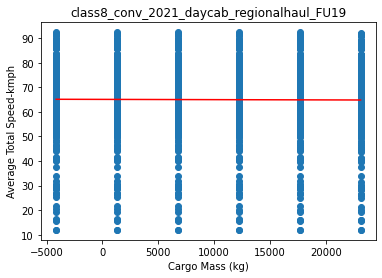

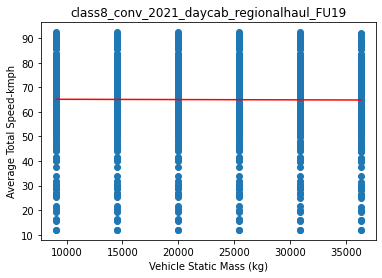

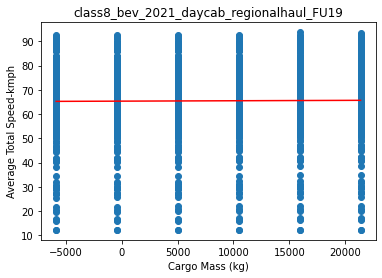

In [140]:
vehicleTypes = pd.Series(df['Vehicle Model-none'].values).unique()

workFrame1 = df[df["Vehicle Model-none"] == vehicleTypes[0]]
workFrame2 = df[df["Vehicle Model-none"] == vehicleTypes[1]]

X = (workFrame1.loc[:, ['Cargo Mass-lbm']]*0.453592).values.reshape(-1, 1)
Y = (workFrame1.loc[:, ['Fuel Consumption per 100 miles-Diesel Equiv. gal/100mi']]/1.60934 / 100).values.reshape(-1, 1)
Z = (workFrame1.loc[:, ['Average Total Speed-mph']]*1.60934).values.reshape(-1, 1)
LR = LinearRegression()  # create object for the class
LR.fit(X, Z)  # perform linear regression
Z_pred = LR.predict(X)  # make predictions
x_label = "Cargo Mass (kg)"
y_label = 'Fuel Consumption per km Diesel (gal/km)'
z_label = 'Average Total Speed-kmph'

# Data Visualization
plt.scatter(X, Z)
plt.plot(X, Z_pred, color='red')
plt.xlabel(x_label)
plt.ylabel(z_label)
plt.title(vehicleTypes[0])
print(vehicleTypes[0])
print("a = ", LR.coef_.item(0), ", b = ", LR.intercept_.item(0), '\n')
vehicleTypes = pd.Series(df['Vehicle Model-none'].values).unique()


X = (workFrame1.loc[:, ['Vehicle Static Mass-lbm']]*0.453592).values.reshape(-1, 1)
LR = LinearRegression()  # create object for the class
LR.fit(X, Z)  # perform linear regression
Z_pred = LR.predict(X)  # make predictions
x_label = "Vehicle Static Mass (kg)"
y_label = 'Fuel Consumption per km Diesel (gal/km)'
z_label = 'Average Total Speed-kmph'

# Data Visualization
plt.figure(2)
plt.scatter(X, Z)
plt.plot(X, Z_pred, color='red')
plt.xlabel(x_label)
plt.ylabel(z_label)
plt.title(vehicleTypes[0])
print(vehicleTypes[0])
print("a = ", LR.coef_.item(0), ", b = ", LR.intercept_.item(0), '\n')



X = (workFrame2.loc[:, ['Cargo Mass-lbm']]*0.453592).values.reshape(-1, 1)
Y = (workFrame2.loc[:, ['Fuel Consumption per 100 miles-Diesel Equiv. gal/100mi']]/1.60934 / 100).values.reshape(-1, 1)
Z = (workFrame2.loc[:, ['Average Total Speed-mph']]*1.60934).values.reshape(-1, 1)
LR = LinearRegression()  # create object for the class
LR.fit(X, Z)  # perform linear regression
Z_pred = LR.predict(X)  # make predictions
x_label = "Cargo Mass (kg)"
y_label = 'Fuel Consumption per km Diesel (gal/km)'
z_label = 'Average Total Speed-kmph'

# Data Visualization
plt.figure(3)
plt.scatter(X, Z)
plt.plot(X, Z_pred, color='red')
plt.xlabel(x_label)
plt.ylabel(z_label)
plt.title(vehicleTypes[1])
print(vehicleTypes[1])
print("a = ", LR.coef_.item(0), ", b = ", LR.intercept_.item(0), '\n')
vehicleTypes = pd.Series(df['Vehicle Model-none'].values).unique()

In [128]:
# dataSourcePath = 'Batch_Div27_Class8_bev_1_Results_metrics.xlsx'
# df2 = pd.read_excel(os.path.join(os.getcwd(), dataSourcePath), \
#                    sheet_name = "DOE",\
#                    index_col=None, \
#                    usecols=['Vehicle Model-none',\
#                       'Battery Energy Consumption per Mile-kWh/mi',\
#                       'Average Total Speed-mph',\
#                       'Cargo Mass-lbm']
#                   )
# print(os.path.join(os.getcwd(), dataSourcePath))
# display(df2)

In [ ]:
vehicleTypes = pd.Series(df['Vehicle Model-none'].values).unique()

workFrame1 = df[df["Vehicle Model-none"] == vehicleTypes[0]]
workFrame2 = df[df["Vehicle Model-none"] == vehicleTypes[1]]

X = (workFrame1.loc[:, ['Cargo Mass-lbm']]*0.453592).values.reshape(-1, 1)
Y = (workFrame1.loc[:, ['Fuel Consumption per 100 miles-Diesel Equiv. gal/100mi']]/1.60934 / 100).values.reshape(-1, 1)
Z = (workFrame1.loc[:, ['Average Total Speed-mph']]/1.60934).values.reshape(-1, 1)
LR = LinearRegression()  # create object for the class
LR.fit(X, Y, Z)  # perform linear regression
Y_pred = LR.predict(X)  # make predictions
x_label = "Cargo Mass (kg)"
y_label = 'Fuel Consumption per km Diesel (gal/km)'
z_label = 'Fuel Consumption per km Diesel (gal/km)'
    

# # Data Visualization
# plt.scatter(X, Y)
# plt.plot(X, Y_pred, color='red')
# plt.xlabel(x_label)
# plt.ylabel(y_label)
# plt.title(vehicleTypes[0])
# print(vehicleTypes[0])
# print("a = ", LR.coef_.item(0), ", b = ", LR.intercept_.item(0), '\n')

# X = (workFrame2.loc[:, ['Cargo Mass-lbm']]*0.453592).values.reshape(-1, 1)
# Y = (workFrame2.loc[:, ['Battery Energy Consumption per Mile-kWh/mi']]/1.60934).values.reshape(-1, 1)
# LR = LinearRegression()  # create object for the class
# LR.fit(X, Y)  # perform linear regression
# x_label = "Cargo Mass (kg)"
# y_label = 'Battery Energy Consumption per km (kWh/km)'
# Y_pred = LR.predict(X)  # make predictions

# # Data Visualization
# plt.figure(0)
# plt.scatter(X, Y)
# plt.plot(X, Y_pred, color='red')
# plt.xlabel(x_label)
# plt.ylabel(y_label)
# plt.title(vehicleTypes[1])
# print(vehicleTypes[1])
# print("a = ", LR.coef_.item(0), ", b = ", LR.intercept_.item(0), '\n')


### LAST 2 plots for Sleeper
vehicleTypes = pd.Series(df2['Vehicle Model-none'].values).unique()

workFrame1 = df2[df2["Vehicle Model-none"] == vehicleTypes[0]]
workFrame2 = df2[df2["Vehicle Model-none"] == vehicleTypes[1]]

X = (workFrame1.loc[:, ['Cargo Mass-lbm']]*0.453592).values.reshape(-1, 1)
Y = (workFrame1.loc[:, ['Battery Energy Consumption per Mile-kWh/mi']]/1.60934).values.reshape(-1, 1)
LR = LinearRegression()  # create object for the class
LR.fit(X, Y)  # perform linear regression
Y_pred = LR.predict(X)  # make predictions
x_label = "Cargo Mass (kg)"
y_label = 'Fuel Consumption per km Diesel (gal/km)'
    

# Data Visualization
plt.figure(3)
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.title(vehicleTypes[0])
print(vehicleTypes[0])
print("a = ", LR.coef_.item(0), ", b = ", LR.intercept_.item(0), '\n')

X = (workFrame2.loc[:, ['Cargo Mass-lbm']]*0.453592).values.reshape(-1, 1)
Y = (workFrame2.loc[:, ['Battery Energy Consumption per Mile-kWh/mi']]/1.60934).values.reshape(-1, 1)
LR = LinearRegression()  # create object for the class
LR.fit(X, Y)  # perform linear regression
x_label = "Cargo Mass (kg)"
y_label = 'Battery Energy Consumption per km (kWh/km)'
Y_pred = LR.predict(X)  # make predictions

# Data Visualization
plt.figure(4)
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.title(vehicleTypes[1])
print(vehicleTypes[1])
print("a = ", LR.coef_.item(0), ", b = ", LR.intercept_.item(0))

In [1]:
pow(16, 2)

256

# 3D Plots

In [ ]:
from skspatial.objects import Plane
from skspatial.objects import Points
from skspatial.plotting import plot_3d

points = Points([[0, 0, 0], [1, 3, 5], [-5, 6, 3], [3, 6, 7], [-2, 6, 7]])

plane = Plane.best_fit(points)

plot_3d(
    points.plotter(c='k', s=50, depthshade=False),
    plane.plotter(alpha=0.2, lims_x=(-5, 5), lims_y=(-5, 5)),
)

In [200]:
# Import libraries
## Basic libs
import pandas as pd
import numpy as np
import warnings
## Building Model
from sklearn import linear_model
from scipy import stats
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
## Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib tk

# warnings.filterwarnings('ignore')
# plt.rcParams['figure.figsize'] = (7, 7)
# plt.style.use('ggplot')

In [194]:
# Loading Dataset
df_trucks = pd.read_excel(os.path.join(os.getcwd(), dataSourcePath), \
                   sheet_name = "DOE",\
                   index_col=None, \
                   usecols=['Vehicle Model-none',\
                      'Fuel Consumption per 100 miles-Diesel Equiv. gal/100mi',\
                      'Battery Energy Consumption per Mile-kWh/mi',\
                      'Average Total Speed-mph',\
                      'Vehicle Static Mass-lbm']
                  )
# Data conversion
df_trucks['Vehicle Static Mass-lbm'] = df_trucks['Vehicle Static Mass-lbm']*0.453592
df_trucks.rename(columns = {'Vehicle Static Mass-lbm':'VehicleStaticMass (kg)'}, inplace = True)
df_trucks['Average Total Speed-mph'] = df_trucks['Average Total Speed-mph']*1.60934
df_trucks.rename(columns = {'Average Total Speed-mph':'AverageSpeed (kmph)'}, inplace = True)

df_trucks['Fuel Consumption per 100 miles-Diesel Equiv. gal/100mi'] = df_trucks['Fuel Consumption per 100 miles-Diesel Equiv. gal/100mi']/160.934
df_trucks.rename(columns = {'Fuel Consumption per 100 miles-Diesel Equiv. gal/100mi':'Fuel Per km (gal/km)'}, inplace = True)
df_trucks['Battery Energy Consumption per Mile-kWh/mi'] = df_trucks['Battery Energy Consumption per Mile-kWh/mi']/1.60934
df_trucks.rename(columns = {'Battery Energy Consumption per Mile-kWh/mi':'BatteryCost (kWh/km)'}, inplace = True)

In [195]:
conv = df_trucks[df_trucks['Vehicle Model-none'] == 'class8_conv_2021_daycab_regionalhaul_FU19']
bev = df_trucks[df_trucks['Vehicle Model-none'] == 'class8_bev_2021_daycab_regionalhaul_FU19']

In [196]:
# Dropping unused columns
conv = conv.drop(['Vehicle Model-none', 'BatteryCost (kWh/km)'], axis = 1)
bev = bev.drop(['Vehicle Model-none', 'Fuel Per km (gal/km)'], axis = 1)

In [197]:
conv

,VehicleStaticMass (kg),Fuel Per km (gal/km),AverageSpeed (kmph)
0,9071.840,0.054278,81.513552
1,14514.944,0.060502,81.516673
2,19958.048,0.067195,81.499186
3,25401.152,0.074168,81.437089
4,30844.256,0.081314,81.328935
...,...,...,...
1627,14514.944,0.061027,74.389454
1628,19958.048,0.067812,74.369246
1629,25401.152,0.075029,74.332183
1630,30844.256,0.082456,74.248945


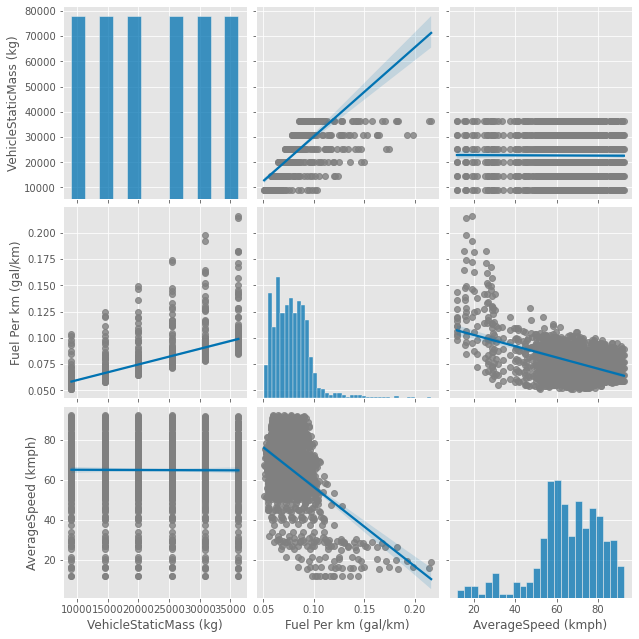

In [175]:
# Testing visualization
sns.set_palette('colorblind')
sns.pairplot(data=conv, kind = 'reg', height=3, plot_kws = {'scatter_kws' : {'color': 'gray'}                                                     })

In [198]:
# Set independent and dependent variables
X = conv[['VehicleStaticMass (kg)', 'AverageSpeed (kmph)']]
y = conv['Fuel Per km (gal/km)']

# Initialize model from sklearn and fit it into our data
regr = linear_model.LinearRegression()
model = regr.fit(X, y)
    
print('Intercept:', model.intercept_)
print('Coefficients:', model.coef_)

Intercept: 0.07951303408981131
Coefficients: [ 1.48479298e-06 -5.31778536e-04]


In [180]:
# # Values to predict
# vehicleMass = input('What is the Vehicle Mass? \n')
# avgSpeed = input('What is the average speed? \n')

# try:
#     print('We predict {:.0f} pies will be sold if we sold the pie at ${} and spend ${} at advertising.'.format(
#         model.predict([[float(vehicleMass), float(avgSpeed)]])[0],
#         vehicleMass, 
#         avgSpeed))
# except ValueError:
#     print('Please only input either:\n- whole number e.g. 1, 4, 7\n- decimal/float number e.g. 3.8')


In [231]:
# Prepare data
X = conv[['VehicleStaticMass (kg)', 'AverageSpeed (kmph)']].values.reshape(-1,2)
Y = conv['Fuel Per km (gal/km)']

# Create range for each dimension
x = X[:, 0]
y = X[:, 1]
z = Y

xx_pred = np.linspace(9000, 37000, 30)  # range of price values
yy_pred = np.linspace(0, 100, 30)  # range of advertising values
xx_pred, yy_pred = np.meshgrid(xx_pred, yy_pred)
model_viz = np.array([xx_pred.flatten(), yy_pred.flatten()]).T

# Predict using model built on previous step
# ols = linear_model.LinearRegression()
# model = ols.fit(X, Y)
predicted = model.predict(model_viz)

# Evaluate model by using it's R^2 score 
r2 = model.score(X, Y)

# Plot model visualization
plt.style.use('fivethirtyeight')

# fig = plt.figure(figsize=(12, 4))
fig = plt.figure()
ax1 = fig.add_subplot(111, projection='3d')
ax1.set_xlabel('VehicleStaticMass (kg)', fontsize=12)
ax1.set_ylabel('AverageSpeed (kmph)', fontsize=12)
ax1.set_zlabel('Fuel Per km (gal/km)', fontsize=12)
ax1.scatter(xx_pred.flatten(), yy_pred.flatten(), predicted, facecolor=(0,0,0,0), s=20, edgecolor='#70b3f0')
ax1.scatter(x, y, z, color='k', alpha=0.5)
fig.suptitle('class8_conv_2021_daycab_regionalhaul_FU19 Cost Visualization ($R^2 = %.2f$)' % r2, fontsize=15, color='k')

plt.show()
# ax1 = fig.add_subplot(131, projection='3d')
# ax2 = fig.add_subplot(132, projection='3d')
# ax3 = fig.add_subplot(133, projection='3d')
# axes = [ax1, ax2, ax3]

# for ax in axes:
#     ax.plot(x, y, z, color='k', zorder=15, linestyle='none', marker='o', alpha=0.5)
#     ax.scatter(xx_pred.flatten(), yy_pred.flatten(), predicted, facecolor=(0,0,0,0), s=20, edgecolor='#70b3f0')
#     ax.set_xlabel('VehicleStaticMass (kg)', fontsize=12)
#     ax.set_ylabel('AverageSpeed (kmph)', fontsize=12)
#     ax.set_zlabel('Fuel Per km (gal/km)', fontsize=12)
#     ax.locator_params(nbins=4, axis='x')
#     ax.locator_params(nbins=5, axis='x')

# ax1.view_init(elev=25, azim=-60)
# ax2.view_init(elev=15, azim=15)
# ax3.view_init(elev=25, azim=60)

# fig.suptitle('Multi-Linear Regression Model Visualization ($R^2 = %.2f$)' % r2, fontsize=15, color='k')

# fig.tight_layout()